In [1]:
import numpy as np
import scanpy as sc
import scvelo as scv
import latentvelo as ltv

Global seed set to 0


In [2]:
adata = scv.read_loom('simdata_bursts.loom')
adata.obs['celltype'] = ['cluster'+str(x) for x in adata.obs['celltype']]

In [3]:
adata = ltv.utils.anvi_clean_recipe(adata, spliced_key='spliced', unspliced_key='unspliced',
                           celltype_key='celltype', umap=True)

Skip filtering by dispersion since number of variables are less than `n_top_genes`.
using all genes
computing neighbors
    finished (0:00:10) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing UMAP


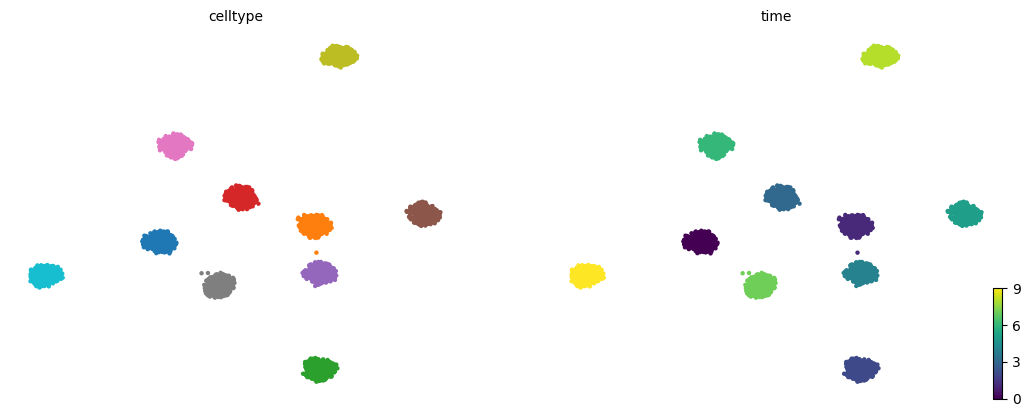

In [4]:
scv.pl.umap(adata, color=['celltype','time'])

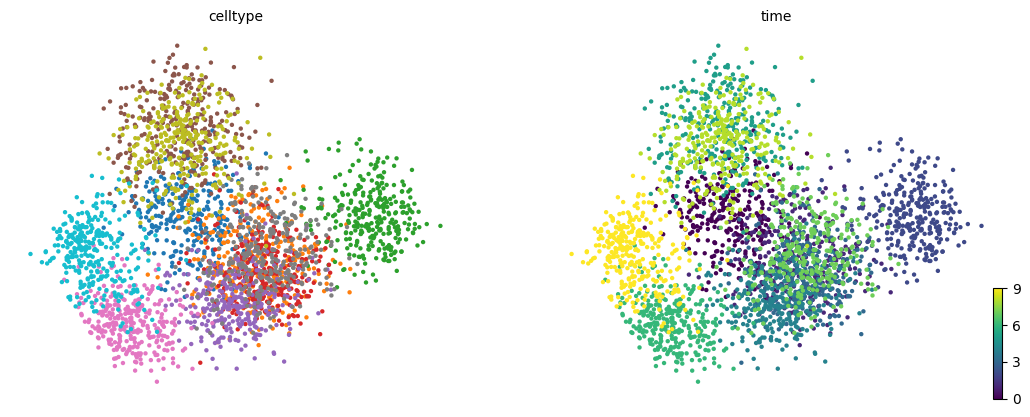

In [5]:
scv.pl.pca(adata, color=['celltype','time'])

In [6]:
model = ltv.models.VAE(observed=100, latent_dim=20, zr_dim=1, h_dim=1,
                           celltypes=len(adata.obs.celltype.unique()))

In [7]:
epochs, val_ae, val_traj = ltv.train(model, adata, batch_size = 100, learning_rate=1e-2,
                                      epochs=50, name='null_synthetic_', grad_clip=100)

92 velocity genes used
epoch 0, full loss 152.680, val loss 44.914, recon MSE 0.505, traj MSE 0.284, reg loss -2.417
epoch 1, full loss 78.140, val loss 26.374, recon MSE 0.477, traj MSE 0.271, reg loss -3.380
epoch 2, full loss 65.177, val loss 14.238, recon MSE 0.452, traj MSE 0.266, reg loss -4.001
epoch 3, full loss 61.198, val loss 2.806, recon MSE 0.408, traj MSE 0.265, reg loss -3.993
epoch 4, full loss 61.428, val loss -7.503, recon MSE 0.370, traj MSE 0.264, reg loss -2.672
epoch 5, full loss 70.285, val loss -16.486, recon MSE 0.391, traj MSE 0.256, reg loss -3.417
epoch 6, full loss 81.126, val loss -23.684, recon MSE 0.351, traj MSE 0.252, reg loss -3.373
epoch 7, full loss 99.741, val loss -29.860, recon MSE 0.373, traj MSE 0.251, reg loss -2.021
epoch 8, full loss 114.638, val loss -34.212, recon MSE 0.361, traj MSE 0.233, reg loss -2.084
epoch 9, full loss 115.605, val loss -36.441, recon MSE 0.338, traj MSE 0.230, reg loss -2.046
epoch 10, full loss 117.825, val loss -3

In [8]:
latent_adata, adata = ltv.output_results(model, adata, gene_velocity=True)

computing velocity graph (using 1/16 cores)


  0%|          | 0/3000 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'spliced_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'spliced_velocity_umap', embedded velocity vectors (adata.obsm)


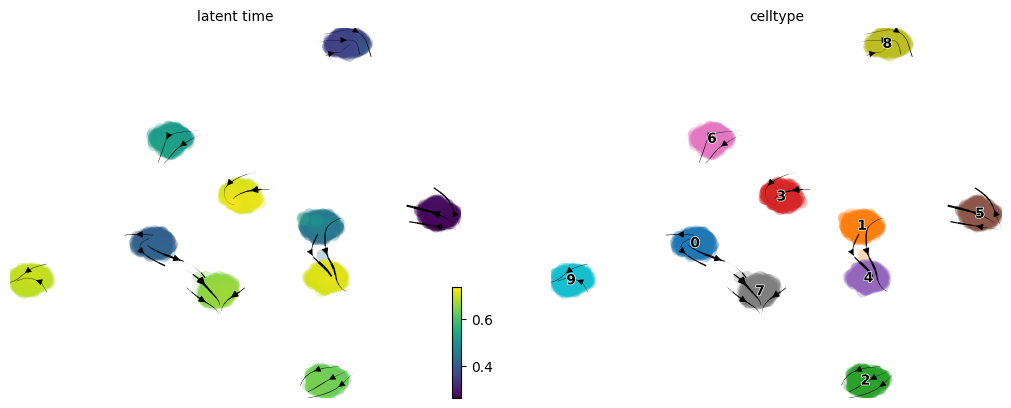

In [9]:
scv.tl.velocity_graph(latent_adata, vkey='spliced_velocity')
scv.pl.velocity_embedding_stream(latent_adata, vkey='spliced_velocity', color=['latent_time', 'celltype'])

saving figure to file figures/umap_null_velocity_May16.png


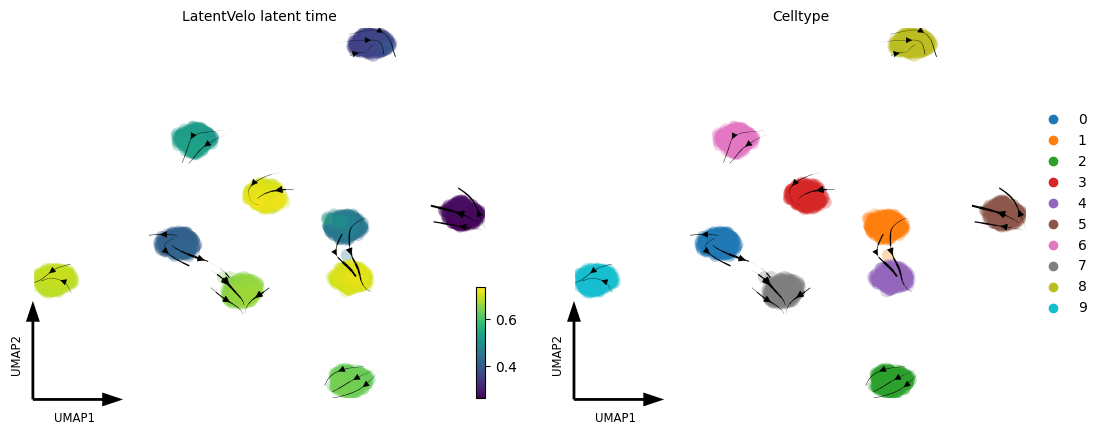

In [10]:
scv.pl.velocity_embedding_stream(latent_adata, basis='umap', 
                                 vkey='spliced_velocity', color=['latent_time', 'celltype'], 
                                 title = ['LatentVelo latent time', 'Celltype'], legend_loc='right',
                                frameon='artist', save='figures/umap_null_velocity.png')

computing velocity embedding
    finished (0:00:01) --> added
    'spliced_velocity_pca', embedded velocity vectors (adata.obsm)


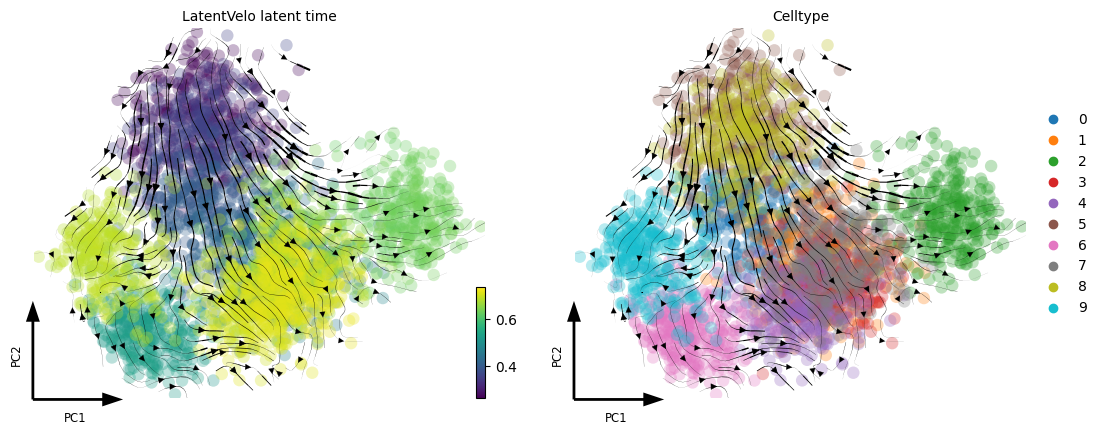

In [11]:
scv.pl.velocity_embedding_stream(latent_adata, basis='pca', 
                                 vkey='spliced_velocity', color=['latent_time', 'celltype'], 
                                 title = ['LatentVelo latent time', 'Celltype'], legend_loc='right',
                                frameon='artist')

saving figure to file figures/pca_null_velocity.png


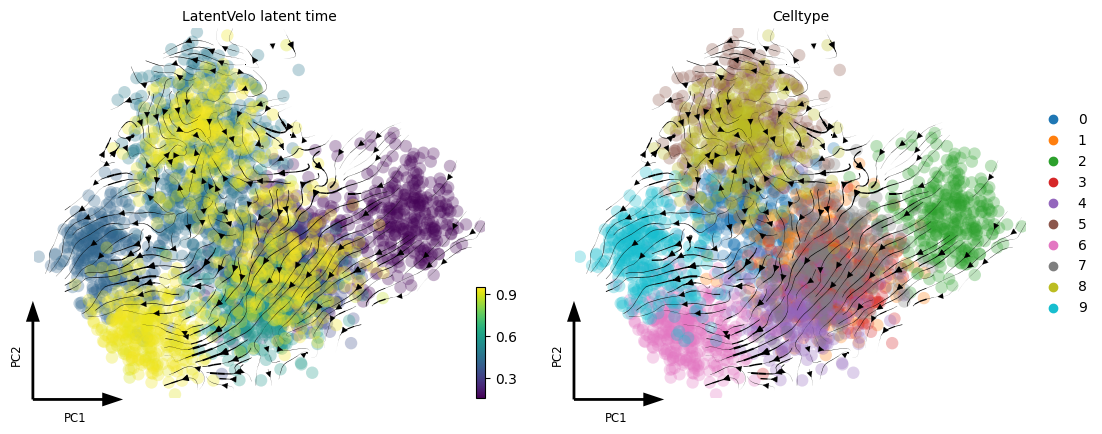

In [15]:
scv.pl.velocity_embedding_stream(latent_adata, basis='pca', 
                                 vkey='spliced_velocity', color=['latent_time', 'celltype'], 
                                 title = ['LatentVelo latent time', 'Celltype'], legend_loc='right',
                                frameon='artist', save='figures/pca_null_velocity.png')

In [15]:
latent_adata

AnnData object with n_obs × n_vars = 3000 × 20
    obs: 'celltype', 'obs_names', 'time', 'spliced_size_factor', 'unspliced_size_factor', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'batch_id', 'celltype_id', 'root', 'terminal', 'latent_time', 'cosine_error', 'latent_time_sem', 'spliced_velocity_self_transition'
    uns: 'pca', 'neighbors', 'umap', 'scale_spliced', 'scale_unspliced', 'celltype_colors', 'index_test', 'spliced_velocity_graph', 'spliced_velocity_graph_neg', 'spliced_velocity_params'
    obsm: 'X_umap', 'X_pca', 'zr', 'zr_velocity', 'h', 'spliced_velocity_umap', 'spliced_velocity_pca'
    layers: 'spliced', 'spliced_traj', 'spliced_velocity', 'unspliced', 'unspliced_traj', 'unspliced_velocity'
    obsp: 'distances', 'connectivities', 'adj'

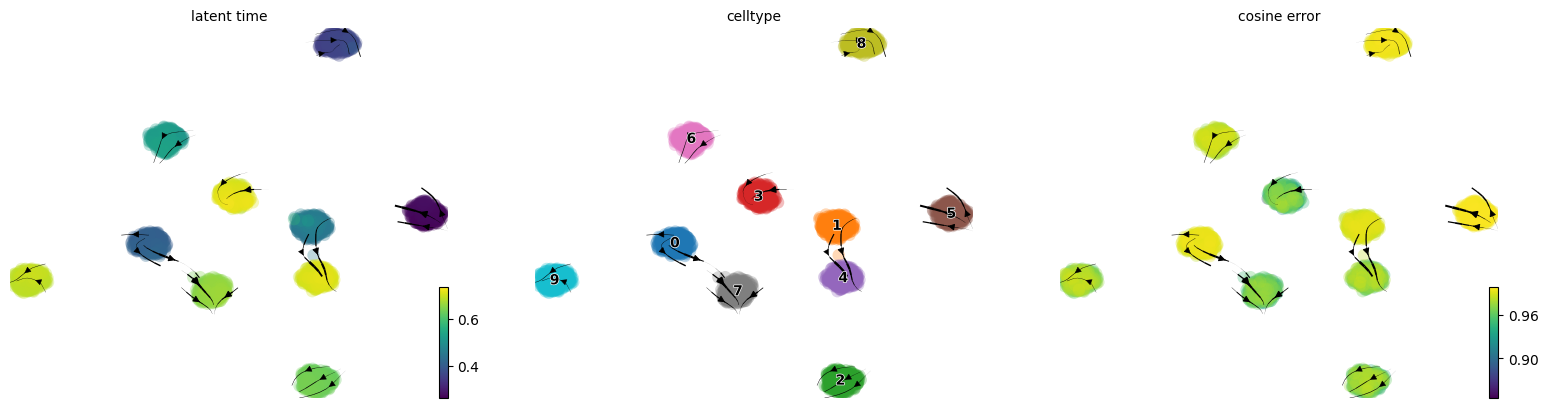

In [13]:
scv.pl.velocity_embedding_stream(latent_adata, vkey='spliced_velocity', 
                                 color=['latent_time', 'celltype', 'cosine_error'])